In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
for i in df.columns :
    x= df[i].value_counts(dropna=False)
    print("\nColumn name :",i,"\n",x)


Column name : Loan_ID 
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Column name : Gender 
 Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

Column name : Married 
 Yes    398
No     213
NaN      3
Name: Married, dtype: int64

Column name : Dependents 
 0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

Column name : Education 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Column name : Self_Employed 
 No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

Column name : ApplicantIncome 
 2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

Column name : CoapplicantIncome 
 0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0   

In [5]:
# Imputing 

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [6]:
# Let's Start Some EDA

matrix = df.corr()
print(matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565620   
CoapplicantIncome        -0.116605           1.000000    0.187828   
LoanAmount                0.565620           0.187828    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036475   
Credit_History           -0.018615           0.011134   -0.001431   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.046531       -0.018615  
CoapplicantIncome         -0.059383        0.011134  
LoanAmount                 0.036475       -0.001431  
Loan_Amount_Term           1.000000       -0.004705  
Credit_History            -0.004705        1.000000  


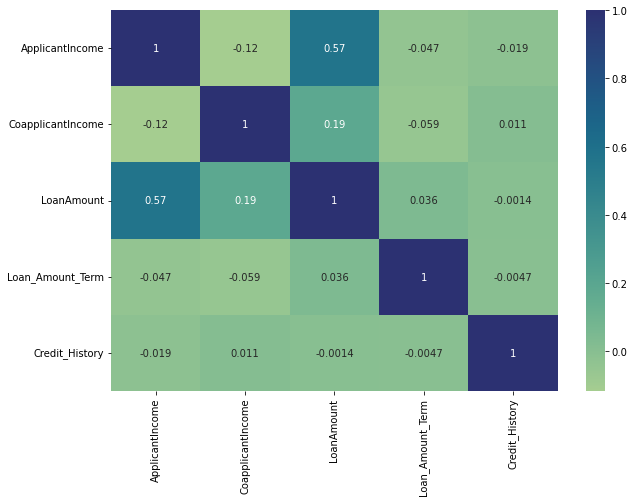

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True , vmax = 1, cmap = 'crest');
#some positive correlation betweem loanAmount and applicantIncome

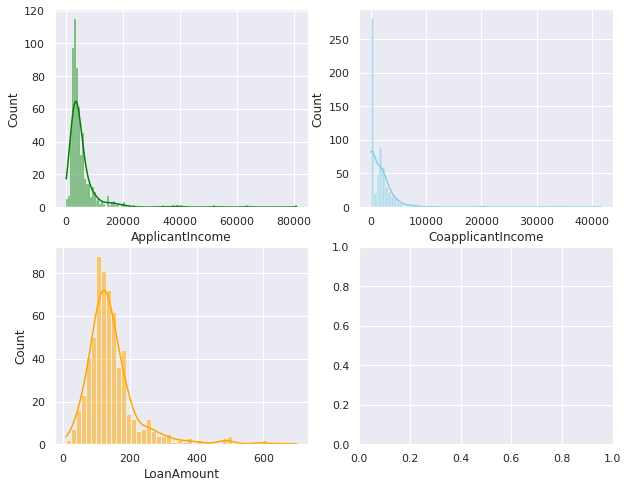

In [8]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

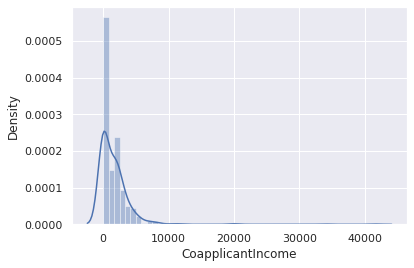

In [9]:
sns.distplot(df['CoapplicantIncome'])
# this is right skewed

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

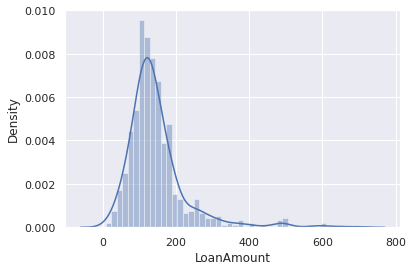

In [10]:
sns.distplot(df['LoanAmount'])
#this is also right skewed

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

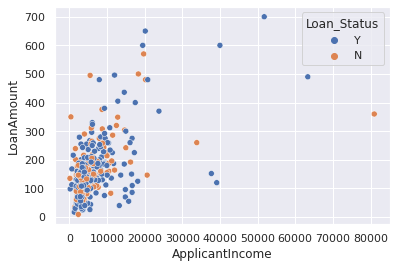

In [11]:
sns.scatterplot(df['ApplicantIncome'] , df['LoanAmount'] , hue = df['Loan_Status'])

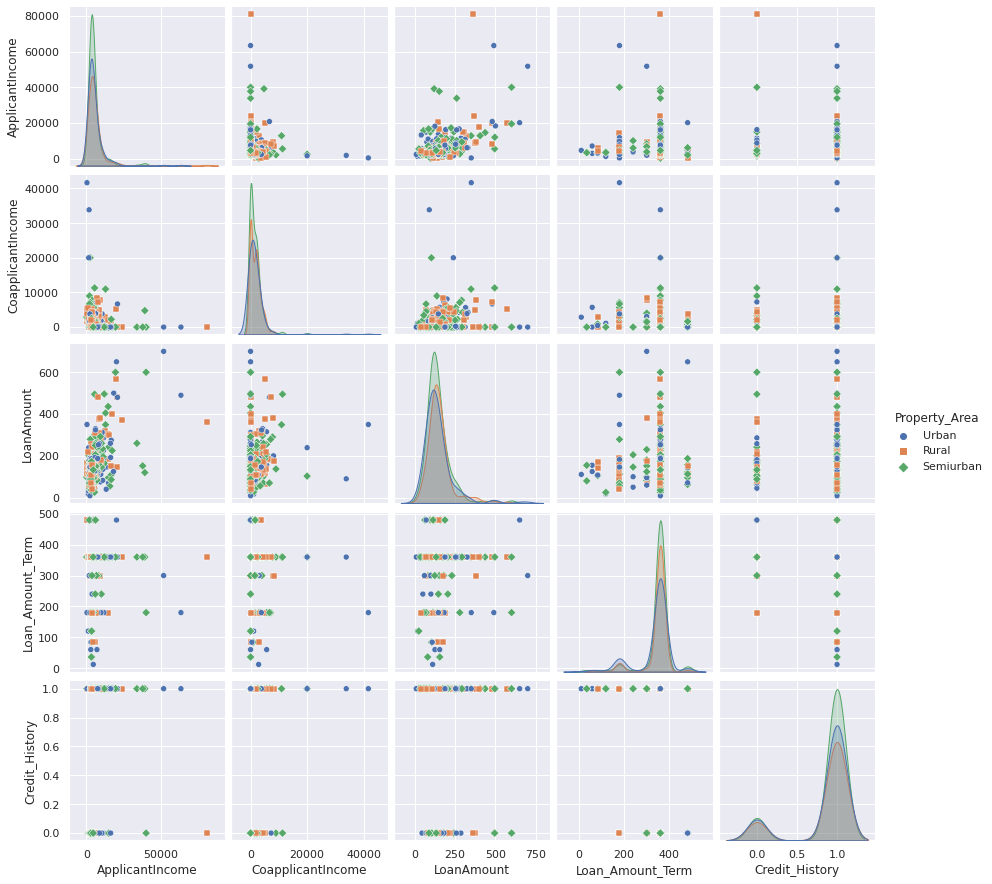

In [12]:
sns.pairplot(df, hue="Property_Area", markers=["o", "s", "D"]);

In [13]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
#prof

In [14]:
# data preprocessing

#unwanted column
df = df.drop(['Loan_ID'], axis = 1)

In [15]:
df['ApplicantIncome']= df['ApplicantIncome']+ df['CoapplicantIncome']
df = df.drop(['CoapplicantIncome'], axis = 1)

In [16]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [17]:
df = pd.get_dummies(df)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [18]:
df.sample(10)

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
336,5938.0,160.0,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,1
276,7267.0,207.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1,0,1
354,2928.0,130.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0,1
287,5704.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,1,0,0,1
588,4750.0,94.0,360.0,1.0,1,0,1,0,0,0,1,0,0,1,0,1
575,3620.0,108.0,84.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1
329,2500.0,67.0,360.0,1.0,0,0,1,0,0,0,1,0,0,0,1,1
144,11757.0,187.0,180.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1
161,7933.0,275.0,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,0
508,5492.0,188.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1


In [19]:
#Handling Outliers

'''percentile25 = df.quantile(0.25)
percentile75 = df.quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df = np.where(
    df > upper_limit,
    upper_limit,
    np.where(
        df < lower_limit,
        lower_limit,
        df
    )
)'''

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

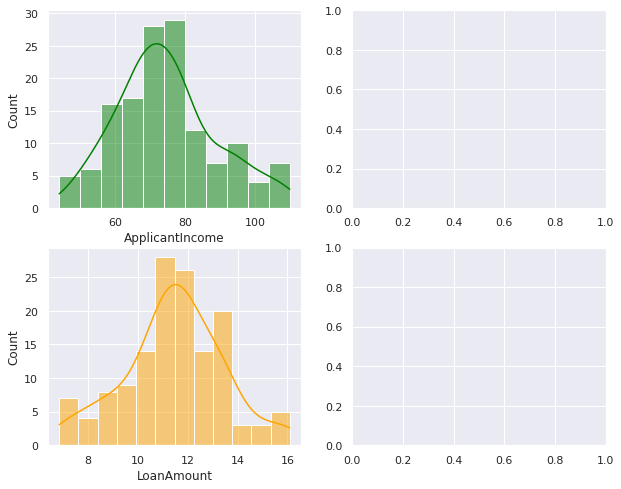

In [20]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

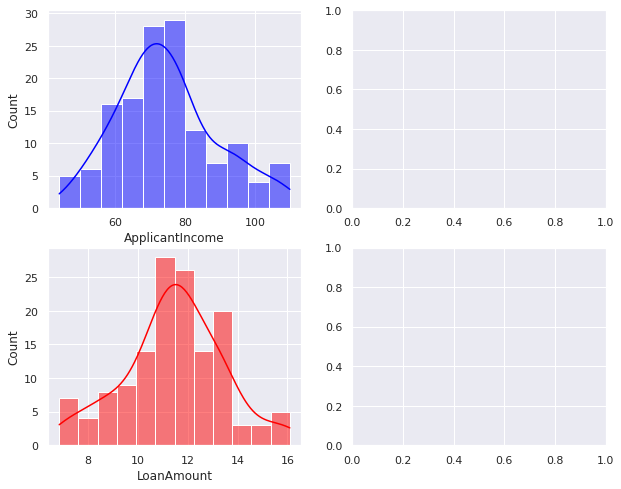

In [21]:
# Logarthmic Transformation

#df.ApplicantIncome = np.log1p(df.ApplicantIncome)
#df.LoanAmount = np.log1p(df.LoanAmount)

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='blue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='red');

In [22]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]


In [23]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [24]:
X = MinMaxScaler().fit_transform(X)

In [25]:
#before starting model training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=100)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,accuracy_score


def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("confussion matrix")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("confussion matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    dt_acc_score = accuracy_score(y_test, y_pred)
    print("Accuracy :",dt_acc_score*100,'\n')

In [27]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(solver='saga', max_iter=1000,random_state=2)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

eval_metric(classifier1, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[20  4]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.83      0.83      0.83        23

    accuracy                           0.83        47
   macro avg       0.83      0.83      0.83        47
weighted avg       0.83      0.83      0.83        47


Train_Set
confussion matrix
[[64 28]
 [19 74]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73        92
           1       0.73      0.80      0.76        93

    accuracy                           0.75       185
   macro avg       0.75      0.75      0.75       185
weighted avg       0.75      0.75      0.75       185


Accuracy : 82.97872340425532 



In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 2)
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)

eval_metric(classifier2, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[24  0]
 [ 8 15]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        24
           1       1.00      0.65      0.79        23

    accuracy                           0.83        47
   macro avg       0.88      0.83      0.82        47
weighted avg       0.87      0.83      0.82        47


Train_Set
confussion matrix
[[92  0]
 [ 0 93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        93

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185


Accuracy : 82.97872340425532 



In [29]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3,4,5,6,7,8,9,10,11,12,13],
    'min_samples_leaf': [10,20, 25, 75, 50, 100,150,200],
    'criterion': ["gini", "entropy"],
    'splitter':['best','random'],
}          
grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_accuracy*100)
print(best_parameters)
print(best_model)

77.36842105263158
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10, 'splitter': 'random'}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=2,
                       splitter='random')


In [30]:
from sklearn.ensemble import RandomForestClassifier


classifier3 = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=20)
classifier3.fit(X_train, y_train)
y_pred = classifier3.predict(X_test)

eval_metric(classifier3, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[21  3]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.84      0.70      0.76        23

    accuracy                           0.79        47
   macro avg       0.80      0.79      0.78        47
weighted avg       0.80      0.79      0.79        47


Train_Set
confussion matrix
[[88  4]
 [ 3 90]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        92
           1       0.96      0.97      0.96        93

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185


Accuracy : 78.72340425531915 



In [31]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[90,100,120,130],
    'max_depth': [3,4,5,6,7,8,9,10,11,12,13],
    'min_samples_leaf': [20, 25, 75],
    'criterion': ["gini", "entropy"],
}          
rf_grid_search = GridSearchCV(estimator = classifier3,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
rf_grid_search.fit(X_train, y_train)
best_accuracy = rf_grid_search.best_score_
best_parameters = rf_grid_search.best_params_
best_model = rf_grid_search.best_estimator_

print(best_accuracy)
print(best_parameters)
print(best_model)

0.7353801169590642
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'n_estimators': 120}
RandomForestClassifier(max_depth=3, max_leaf_nodes=20, min_samples_leaf=20,
                       n_estimators=120, random_state=1)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 3)
classifier4.fit(X_train, y_train)
y_pred = classifier4.predict(X_test)

eval_metric(classifier4, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[22  2]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.89      0.70      0.78        23

    accuracy                           0.81        47
   macro avg       0.82      0.81      0.81        47
weighted avg       0.82      0.81      0.81        47


Train_Set
confussion matrix
[[84  8]
 [11 82]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        92
           1       0.91      0.88      0.90        93

    accuracy                           0.90       185
   macro avg       0.90      0.90      0.90       185
weighted avg       0.90      0.90      0.90       185


Accuracy : 80.85106382978722 



In [33]:
scores=[]

for i in range(1,40):
    classifier4 = KNeighborsClassifier(n_neighbors = i)
    classifier4.fit(X_train, y_train)
    y_pred = classifier4.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
maxi_ind=-1
maxi=0
cnt=0
for i in scores:
    cnt+=1
    if maxi<i:
        max_ind = cnt
        maxi = i
print(max_ind)

10


In [34]:
classifier4 = KNeighborsClassifier(n_neighbors = max_ind)
classifier4.fit(X_train, y_train)
y_pred = classifier4.predict(X_test)

eval_metric(classifier4, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[21  3]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.86      0.83      0.84        23

    accuracy                           0.85        47
   macro avg       0.85      0.85      0.85        47
weighted avg       0.85      0.85      0.85        47


Train_Set
confussion matrix
[[72 20]
 [16 77]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        92
           1       0.79      0.83      0.81        93

    accuracy                           0.81       185
   macro avg       0.81      0.81      0.81       185
weighted avg       0.81      0.81      0.81       185


Accuracy : 85.1063829787234 

